# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing, model_selection
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization, ReLU 
from keras import regularizers, optimizers
from tensorflow.keras.optimizers import SGD, Adam
from keras.metrics import MeanSquaredError, MeanAbsoluteError
from sklearn.metrics import r2_score

# Loading and Preprocessing the data

In [2]:
Data = pd.read_csv('CabeRobotDataset.csv')
Data.head()

,L1,L2,L3,L4,Position_X,Position_Y,Position_Z,Angle_X,Angle_Y,Angle_Z
0,461.166563,527.891485,330.211363,216.164268,-1.783470,-1.101713,0.498178,-44.855963,42.772941,-36.879440
1,434.281826,504.768004,336.214319,224.606689,-1.521147,-1.050603,0.496711,-62.913131,14.550584,-0.788276
2,407.947874,482.425327,344.759842,236.531444,-1.215218,-1.055153,0.495204,-65.067241,12.610029,-0.992299
3,382.268810,460.978086,355.671803,251.451641,-0.910285,-1.060034,0.494934,-66.537934,10.111643,-1.104216
4,357.373203,440.557239,368.746148,268.879329,-0.606209,-1.064768,0.495358,-67.508009,7.142119,-0.970741


In [3]:
x = np.concatenate(([Data['L1']],[Data['L2']],[Data['L3']],[Data['L4']]), axis=0).transpose()
y = np.concatenate(([Data['Position_X']],[Data['Position_Y']],[Data['Position_Z']],[Data['Angle_X']],[Data['Angle_Y']],[Data['Angle_Z']]), axis=0).transpose()

In [4]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = model_selection.train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [5]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_val = sc.transform(x_val)

# Implementing the model 

In [27]:
model = Sequential()
model.add(Dense(units=32, kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dense(units=32, kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.2))
model.add(Dense(units=32*2, kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dense(units=32*2, kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.3))
model.add(Dense(units=32*4, kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.4))
model.add(Dense(units=32*4, kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dense(6))

In [7]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    0.001,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

In [28]:
def R2(y_true, y_pred):
  m = MeanSquaredError()
  m.update_state(y_true, y_pred)
  x = m.result().numpy()
  return 1-x/np.var(y_true)

model.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9), loss=['mean_squared_error'], metrics=[R2], run_eagerly=True)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 32)                160       
                                                                 
 batch_normalization_12 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_13 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 activation_13 (Activation)  (None, 32)               

In [29]:
history = model.fit(x_train, y_train, batch_size = 64, epochs = 150, validation_data=(x_val, y_val))

Epoch 1/150
20/20 [==============================] - 2s 80ms/step - loss: 219.2281 - R2: 0.1000 - val_loss: 203.2417 - val_R2: 0.0488
Epoch 2/150
20/20 [==============================] - 1s 70ms/step - loss: 118.4438 - R2: 0.5227 - val_loss: 112.2021 - val_R2: 0.4853
Epoch 3/150
20/20 [==============================] - 1s 74ms/step - loss: 56.2622 - R2: 0.7566 - val_loss: 31.5493 - val_R2: 0.8482
Epoch 4/150
20/20 [==============================] - 1s 69ms/step - loss: 53.2010 - R2: 0.7561 - val_loss: 38.7429 - val_R2: 0.8191
Epoch 5/150
20/20 [==============================] - 1s 71ms/step - loss: 43.7117 - R2: 0.8180 - val_loss: 95.9771 - val_R2: 0.5497
Epoch 6/150
20/20 [==============================] - 1s 68ms/step - loss: 43.7977 - R2: 0.8059 - val_loss: 145.8151 - val_R2: 0.3174
Epoch 7/150
20/20 [==============================] - 1s 69ms/step - loss: 39.0259 - R2: 0.8287 - val_loss: 124.6430 - val_R2: 0.3980
Epoch 8/150
20/20 [==============================] - 1s 73ms/step - lo

# Evaluation

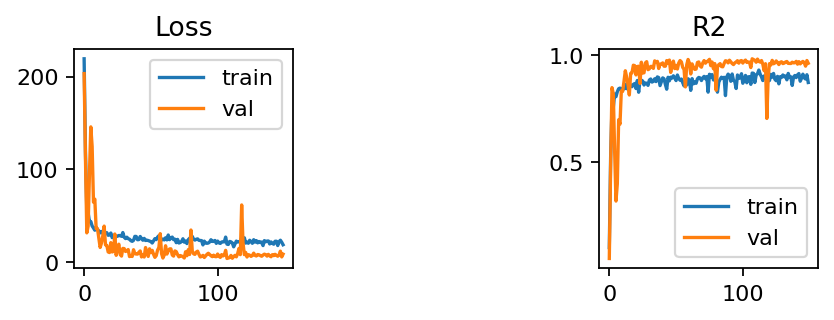

In [30]:
plt.figure(dpi=160)

plt.subplot(231)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

plt.subplot(233)
plt.title('R2')
plt.plot(history.history['R2'], label='train')
plt.plot(history.history['val_R2'], label='val')
plt.legend()
plt.show()

In [31]:
print('\nFor Test Set')
x = model.evaluate(x_test,y_test, verbose=0)
print('loss:', x[0])
print('R2:',x[1])


For Test Set
loss: 8.758353233337402
R2: 0.9615541696548462
